In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 

import pickle

In [2]:
purchase_df = pd.read_csv('C:/Users/Yash Shetty/Downloads/customer_analytics_fmcg-main/customer_analytics_fmcg-main/purchase data.csv', index_col = 0)
purchase_df.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58693 entries, 200000001 to 200000500
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                58693 non-null  int64  
 1   Incidence          58693 non-null  int64  
 2   Brand              58693 non-null  int64  
 3   Quantity           58693 non-null  int64  
 4   Last_Inc_Brand     58693 non-null  int64  
 5   Last_Inc_Quantity  58693 non-null  int64  
 6   Price_1            58693 non-null  float64
 7   Price_2            58693 non-null  float64
 8   Price_3            58693 non-null  float64
 9   Price_4            58693 non-null  float64
 10  Price_5            58693 non-null  float64
 11  Promotion_1        58693 non-null  int64  
 12  Promotion_2        58693 non-null  int64  
 13  Promotion_3        58693 non-null  int64  
 14  Promotion_4        58693 non-null  int64  
 15  Promotion_5        58693 non-null  int64  
 16  Sex       

In [4]:
purchase_df.describe()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,2.159945,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,0.089825,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.170000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,2.240000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


In [5]:
purchase_df.isna().sum()

Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [6]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

In [7]:
features = purchase_df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
purchase_segm_std = scaler.transform(features)
purchase_segm_pca = pca.transform(purchase_segm_std)
purchase_segm_kmeans_pca= kmeans_pca.predict(purchase_segm_pca)
purchase_df['Segment'] = purchase_segm_kmeans_pca
purchase_df= purchase_df.reset_index()
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [8]:
traffic_freq = purchase_df[['ID','Incidence']].groupby(['ID']).count()
purchase_freq = purchase_df[['ID','Incidence']].groupby(['ID']).sum()
segm_info = purchase_df[['ID', 'Segment']].groupby(['ID']).mean()

traffic_freq = traffic_freq.rename(columns = {'Incidence': 'Visits'})
purchase_freq = purchase_freq.rename(columns = {'Incidence': 'Purchases'})

# Average number of purchases by customer ID
df_customer = traffic_freq.join(purchase_freq)
df_customer['Avg_Purchases'] = df_customer.Purchases/ df_customer.Visits

purchase_descr = df_customer.join(segm_info)
purchase_descr.head()

,Visits,Purchases,Avg_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


In [9]:
segm_prop = purchase_descr[['Visits', 'Segment']].groupby(['Segment']).count() / purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'Visits': 'Segment Proportions'}).reset_index()
segm_prop.Segment.replace({0: 'Fewer-Opportunities', 1: 'Career-Focused',   2: "Standard", 3:"Well-Off"}, inplace=True)
segm_prop.head()

,Segment,Segment Proportions
0,Fewer-Opportunities,0.376
1,Career-Focused,0.220
2,Standard,0.208
3,Well-Off,0.196


Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

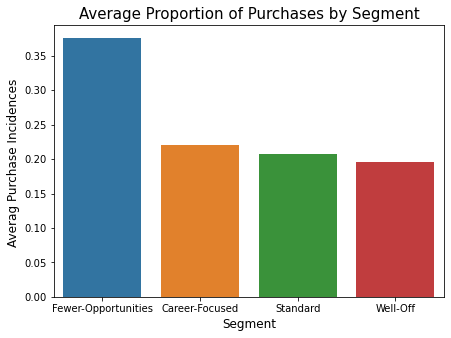

In [10]:
plt.figure(figsize=[7,5])
sns.barplot(data = segm_prop, x = 'Segment', y = 'Segment Proportions')
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

In [11]:
purchase_incidence = purchase_df.query('Incidence ==1')
brand_dummies = pd.get_dummies(purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = purchase_incidence['Segment'], purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001


In [12]:
brand_ID = brand_dummies.groupby(['ID'], as_index = True).mean()
mean_brand_segment = brand_ID.groupby(['Segment'], as_index = True).mean()
mean_brand_segment

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.138299,0.679494,0.021034,0.061875,0.099298
1,0.072871,0.146808,0.039976,0.112395,0.627951
2,0.248771,0.402305,0.154976,0.058902,0.135045
3,0.041928,0.117422,0.030610,0.613623,0.196417


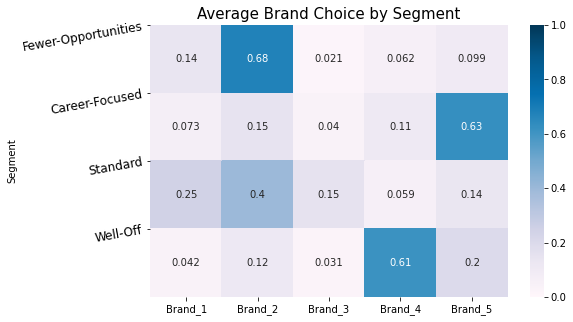

In [13]:
plt.figure(figsize=[8,5])
sns.heatmap(mean_brand_segment, vmin = 0, vmax = 1, cmap = 'PuBu', annot = True)
plt.yticks([0, 1, 2, 3], ['Fewer-Opportunities', 'Career-Focused', 'Standard', 'Well-Off'], rotation = 10, fontsize = 12)
plt.title('Average Brand Choice by Segment', fontsize = 15)
plt.show()

In [14]:
brand_1 = purchase_df.query('Brand ==1')
brand_2 = purchase_df.query('Brand ==2')
brand_3 = purchase_df.query('Brand ==3')
brand_4 = purchase_df.query('Brand ==4')
brand_5 = purchase_df.query('Brand ==5')

brand_1.loc[:, 'Revenue_Brand_1'] = brand_1['Price_1'] * brand_1['Quantity']
brand_2.loc[:, 'Revenue_Brand_2'] = brand_2['Price_2'] * brand_2['Quantity']
brand_3.loc[:, 'Revenue_Brand_3'] = brand_3['Price_3'] * brand_3['Quantity']
brand_4.loc[:, 'Revenue_Brand_4'] = brand_4['Price_4'] * brand_4['Quantity']
brand_5.loc[:, 'Revenue_Brand_5'] = brand_5['Price_5'] * brand_5['Quantity']

brand_1_segm = brand_1.groupby('Segment')['Revenue_Brand_1'].sum()
brand_2_segm = brand_2.groupby('Segment')['Revenue_Brand_2'].sum()
brand_3_segm = brand_3.groupby('Segment')['Revenue_Brand_3'].sum()
brand_4_segm = brand_4.groupby('Segment')['Revenue_Brand_4'].sum()
brand_5_segm = brand_5.groupby('Segment')['Revenue_Brand_5'].sum()

segments_brand_revenue = pd.DataFrame({'Segment' :  ['Fewer-Opportunities', 'Career-Focused', 'Standard', 'Well-Off'] ,
                                      'Revenue_Brand_1': brand_1_segm.values, 
                                      'Revenue_Brand_2': brand_2_segm.values, 
                                      'Revenue_Brand_3': brand_3_segm.values, 
                                      'Revenue_Brand_4': brand_4_segm.values, 
                                      'Revenue_Brand_5': brand_5_segm.values})

segments_brand_revenue.loc[:, 'Total_Rev'] = segments_brand_revenue.sum(axis =1)
segments_brand_revenue.loc[:,'Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue

C:\Users\Yash Shetty\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Yash Shetty\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue_Brand_1,Revenue_Brand_2,Revenue_Brand_3,Revenue_Brand_4,Revenue_Brand_5,Total_Rev,Segment Proportions
0,Fewer-Opportunities,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
1,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
2,Standard,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
3,Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


In [15]:
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
purchase_df = purchase_df.merge(segment_dummies, how='inner',
                                                left_on = purchase_df.index,
                                                right_on = segment_dummies.index)
df_segment = purchase_df.set_index('ID').iloc[:,1:].copy()
df_segment.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,47,1,110866,1,0,0,1,0,0,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,47,1,110866,1,0,0,1,0,0,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,47,1,110866,1,0,0,1,0,0,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,47,1,110866,1,0,0,1,0,0,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,47,1,110866,1,0,0,1,0,0,0


In [16]:
from sklearn.linear_model import LogisticRegression 

output = df_segment['Incidence']  
inputs = pd.DataFrame()
inputs['Mean_Price'] =df_segment.iloc[:, 6:11].mean(axis=1)
Logitmodel_purchase = LogisticRegression(solver = 'sag')
Logitmodel_purchase.fit(inputs, output)
Logitmodel_purchase.coef_

array([[-2.3480071]])

In [17]:
df_segment.iloc[: , 6:11].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [29]:
price_range = np.arange(1, 3, 0.05)
price_range_df = pd.DataFrame(price_range)
output_pred = Logitmodel_purchase.predict_proba(price_range_df)
purchase_prob = output_pred[:][:, 1]
price_elasticity = Logitmodel_purchase.coef_[:, 0] * price_range * (1 - purchase_prob)

In [30]:
def seg_coef(i):
    segment = df_segment.query('Segment == @i')


    output_segm = segment['Incidence']
    inputs_segm = pd.DataFrame()
    inputs_segm['Mean_Price'] =segment.iloc[:, 6:11].mean(axis=1)

    model_segm = LogisticRegression(solver = 'sag')
    model_segm.fit(inputs_segm, output_segm)

    # price elasticities calculation
    Y_segm = model_segm.predict_proba(price_range_df)
    purchase_prob_segm = Y_segm[:][: , 1]
    pe_segm = model_segm.coef_[:,0] * price_range *( 1- purchase_prob_segm)
    return model_segm.coef_, pe_segm

In [31]:
df_price_elasticities = pd.DataFrame({'Price_Point': price_range, 
                                      'Mean_PE': price_elasticity,
                                      'PE_FO': seg_coef(0)[1], 
                                      'PE_Cf': seg_coef(1)[1], 
                                      'PE_Strd': seg_coef(2)[1], 
                                      'PE_WO': seg_coef(3)[1]})

df_price_elasticities.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Price_Point,1.000000,1.050000,1.100000,1.150000,1.200000,1.250000,1.300000,1.350000,1.400000,1.450000,...,2.500000,2.550000,2.600000,2.650000,2.700000,2.750000,2.800000,2.850000,2.900000,2.950000
Mean_PE,-0.526670,-0.604987,-0.691606,-0.786865,-0.891013,-1.004199,-1.126452,-1.257680,-1.397652,-1.546008,...,-5.325943,-5.488816,-5.648544,-5.805232,-5.959001,-6.109987,-6.258336,-6.404198,-6.547727,-6.689073
PE_FO,-0.350771,-0.433444,-0.532611,-0.650623,-0.789839,-0.952496,-1.140547,-1.355474,-1.598099,-1.868403,...,-8.744895,-8.977200,-9.202602,-9.421950,-9.636015,-9.845492,-10.050996,-10.253069,-10.452191,-10.648775
PE_Cf,-0.471757,-0.526655,-0.585717,-0.649038,-0.716683,-0.788690,-0.865067,-0.945788,-1.030795,-1.119995,...,-3.562833,-3.684810,-3.805821,-3.925777,-4.044612,-4.162270,-4.278715,-4.393919,-4.507870,-4.620563
PE_Strd,-0.684529,-0.749050,-0.816611,-0.887138,-0.960539,-1.036704,-1.115510,-1.196818,-1.280479,-1.366335,...,-3.389071,-3.485207,-3.580759,-3.675705,-3.770025,-3.863708,-3.956747,-4.049138,-4.140882,-4.231985
PE_WO,-0.508397,-0.553611,-0.600910,-0.650280,-0.701702,-0.755144,-0.810571,-0.867936,-0.927187,-0.988264,...,-2.545278,-2.625183,-2.705048,-2.784822,-2.864459,-2.943917,-3.023159,-3.102151,-3.180863,-3.259270


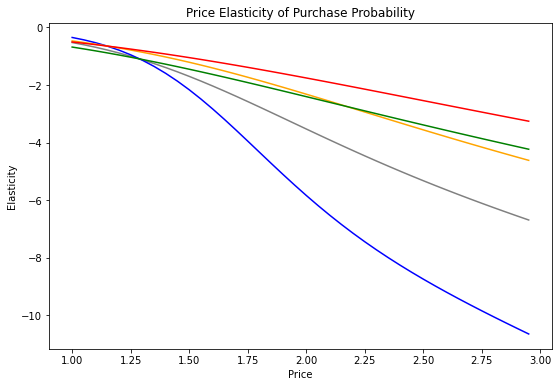

In [32]:
plt.figure(figsize = (9, 6))
ax1=plt.plot(price_range, price_elasticity, color = 'grey', label="Average")
ax2=plt.plot(price_range, seg_coef(0)[1], color = 'b', label='Fewer-Opportunities')
ax3=plt.plot(price_range, seg_coef(1)[1], color = 'orange', label='Career-Focused')
ax4=plt.plot(price_range, seg_coef(2)[1], color = 'g', label='Standard')
plt.plot(price_range, seg_coef(3)[1], color = 'r', label='Well-Off')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.show()